# Data Science Final Project - Rizky Maulana Saputra

## Data Understanding

Dataset yang digunakan diambil dari Spada UMS terkait Student Academic Performance
Dataset ini memiliki 1.000 baris dan 16 kolom data yang mempresentasikan :
- student_id : ID unik yang dimiliki pelajar
- age : Umur dari pelajar
- gender : Kelamin dari setiap pelajar (Male/Female/Other)
- study_hours_per_day : Total jam belajar pelajar perharinya
- social_media_hours : Total jam menggunakan Social Media perharinya
- netflix_hours : Total jam menggunakan Netflix perharinya
- part_time_job : Pelajar melakukan Part Time Job (Yes/No)
- attendance_percentage : Persentase kedatangan pelajar
- sleep_hours : Total jam tidur perharinya
- diet_quality : Kondisi Diet Quality tiap pelajar (Poor/Good/Fair)
- exercise_frequency : Frekuensi Exercise dari setiap pelajar
- parental_education_level : Pendidikan terakhir Orang Tua
- internet_quality : Kualitas dari Internet yang digunakan pelajar (Poor/Average/Good)
- mental_health_rating : Rating dari Mental Health pelajar (1-10)
- extracurricular_participation : Ekstrakulikuler yang di ikuti pelajar
- exam_score : Nilai Ujian Pelajar

Kondisi Data :
- Missing Values : Dilakukan pada Exploratory Data Analytics yakni terdapat missing values pada kolom gender (5), attendance_percentage (3) dan parental_education_level (91)
- Duplicated Data : Dilakukan pada Exploratory Data Analytics yakni tidak terdapat duplikat pada data
- Outlier : Dilakukan pada Exploratory Data Analytics terlihat terdapat outlier di kolom :
  - Kolom age : 0 outlier
  - Kolom study_hours_per_day : 7 outlier
  - Kolom social_media_hours : 5 outlier
  - Kolom netflix_hours : 4 outlier
  - Kolom attendance_percentage : 5 outlier
  - Kolom sleep_hours : 2 outlier
  - Kolom exercise_frequency : 0 outlier
  - Kolom mental_health_rating : 0 outlier
  - Kolom exam_score : 2 outlier

- Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

- Load Dataset

In [2]:
df = pd.read_csv('../data/student_habits.csv')

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Exploratory Data Analytics


1. Pemeriksaan Struktur Data, Missing Values dan Duplicate Data

In [4]:
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [5]:
df.isna().sum()

student_id                        0
age                               0
gender                            5
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             3
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

2. Statistik Deskriptif

In [7]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,83.995286,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.909688,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,10.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,77.900000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.100000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


3. Outlier

In [8]:
def check_outlier(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier = df[(df[data] < lower) | (df[data] > upper)]
    print(f"Kolom {data} : {len(outlier)} outlier")

numeric = df.select_dtypes(include='number').columns
for i in numeric:
    check_outlier(i)

Kolom age : 0 outlier
Kolom study_hours_per_day : 7 outlier
Kolom social_media_hours : 5 outlier
Kolom netflix_hours : 4 outlier
Kolom attendance_percentage : 5 outlier
Kolom sleep_hours : 2 outlier
Kolom exercise_frequency : 0 outlier
Kolom mental_health_rating : 0 outlier
Kolom exam_score : 2 outlier


4. Visualization

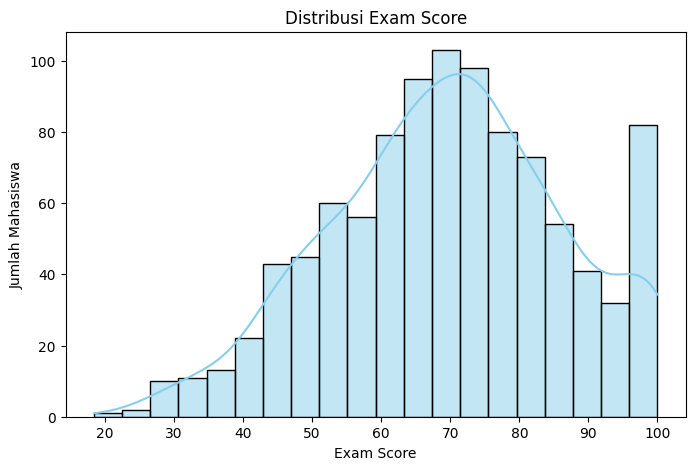

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

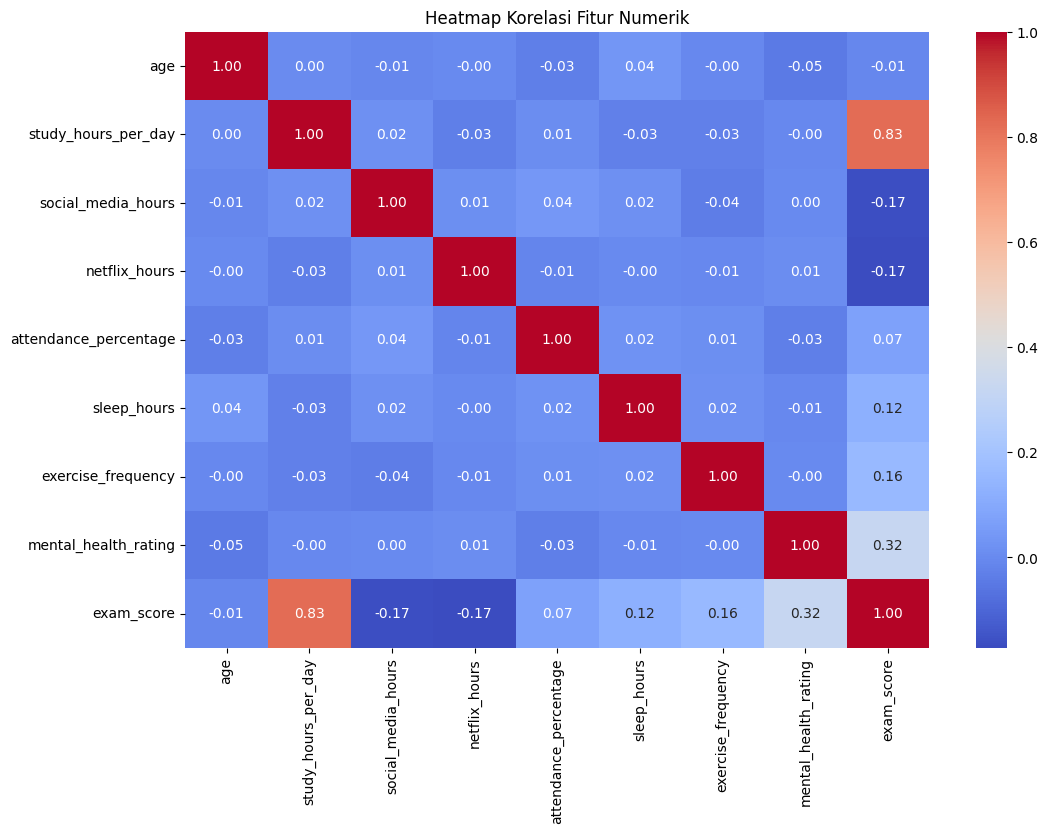

In [10]:
plt.figure(figsize=(12, 8))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

<Figure size 1000x600 with 0 Axes>

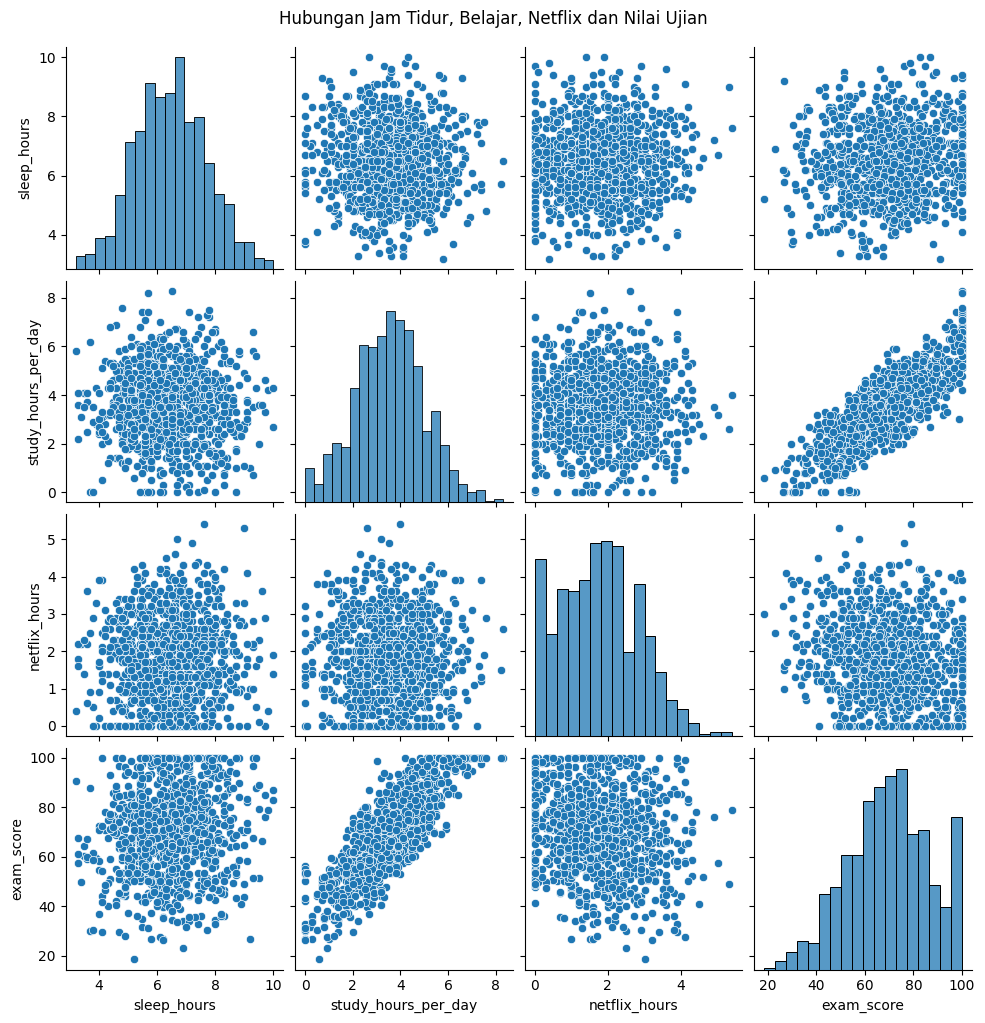

In [11]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['sleep_hours', 'study_hours_per_day', 'netflix_hours', 'exam_score']])
plt.suptitle('Hubungan Jam Tidur, Belajar, Netflix dan Nilai Ujian', y=1.02)
plt.show()

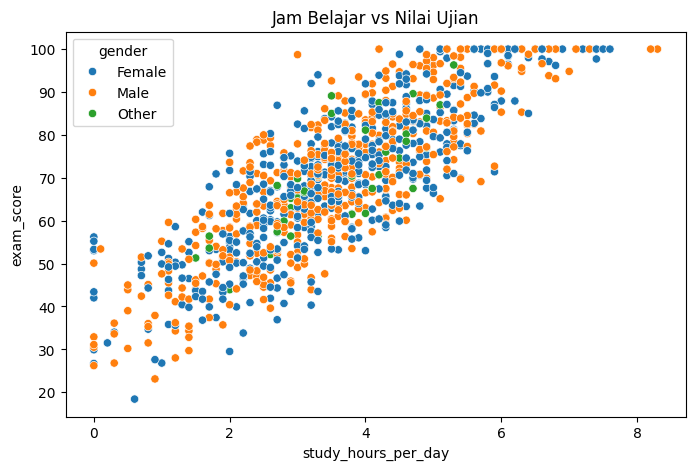

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, hue='gender')
plt.title('Jam Belajar vs Nilai Ujian')
plt.show()

Insight :
- Rata rata student memiliki nilai sekitar 70an
- Semakin banyak study_hours_per_day semaking tinggi exam_score nya
- Feature yang mempengaruhi target yaitu study_hours_per_day dan mental_health_rating

## Data Preparation

1. Handling Missing Values

In [24]:
df['attendance_percentage'] = df['attendance_percentage'].fillna(df['attendance_percentage'].median())
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df.isna().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

2. Feature Engineering

In [14]:
binary_mapping = {'Yes' : 1, 'No' : 0}
df['part_time_job'] = df['part_time_job'].map(binary_mapping)
df['extracurricular_participation'] = df['extracurricular_participation'].map(binary_mapping)

diet_order = ['Poor', 'Fair', 'Good']
parent_edu = ['High School', 'Bachelor', 'Master']
internet_order = ['Poor', 'Average', 'Good']
ordinal = OrdinalEncoder(categories=[diet_order, parent_edu, internet_order])
df[['diet_quality', 'parental_education_level', 'internet_quality']] = ordinal.fit_transform(
    df[['diet_quality', 'parental_education_level', 'internet_quality']]
)

label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])

In [15]:
df[['gender', 'diet_quality', 'parental_education_level', 'internet_quality', 'part_time_job', 'extracurricular_participation']].head()

,gender,diet_quality,parental_education_level,internet_quality,part_time_job,extracurricular_participation
0,0,1.0,2.0,1.0,0,1
1,0,2.0,0.0,1.0,0,0
2,1,0.0,0.0,0.0,0,0
3,0,0.0,2.0,2.0,0,1
4,0,1.0,2.0,2.0,0,0


3. Mengkonversi Tipe Data dan Drop data

In [16]:
df = df.drop(columns='student_id')
df['gender'] = df['gender'].astype(float)
df['part_time_job'] = df['part_time_job'].astype(float)
df['age'] = df['age'].astype(float)
df['exercise_frequency'] = df['exercise_frequency'].astype(float)
df['mental_health_rating'] = df['mental_health_rating'].astype(float)
df['extracurricular_participation'] = df['extracurricular_participation'].astype(float)

4. Handling Outlier

In [17]:
def handling_outlier(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df.loc[df[data] > upper, data] = upper
    df.loc[df[data] < lower, data] = lower

for i in numeric:
    handling_outlier(i)
    check_outlier(i)

Kolom age : 0 outlier
Kolom study_hours_per_day : 0 outlier
Kolom social_media_hours : 0 outlier
Kolom netflix_hours : 0 outlier
Kolom attendance_percentage : 0 outlier
Kolom sleep_hours : 0 outlier
Kolom exercise_frequency : 0 outlier
Kolom mental_health_rating : 0 outlier
Kolom exam_score : 0 outlier


5. Splitting Data

In [18]:
X = df.drop(columns='exam_score')
y = df['exam_score']


X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

1. Linear Regression

In [20]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

## Evaluation

In [21]:
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 4.1055
R² Score: 0.8997


Insight :
- Dari MAE terlihat terdapat nilai 4.1 jadi model ini meleset sekitar 4.1 dari nilai asli
- Dari R2 Score mencapai 89% menandakan bahwa model mampu menjelaskan 89% variasi data

In [22]:
def predict_exam_score(input_data):
    df_input = pd.DataFrame([input_data])
    X_input_scaled = scaler.transform(df_input)
    pred = model_lr.predict(X_input_scaled)
    return pred[0]

# Contoh input data baru dari user
user_input = {
    'age': 21.0,
    'gender': 1.0,
    'study_hours_per_day': 6.0,
    'social_media_hours': 3.5,
    'netflix_hours': 3.0,
    'part_time_job': 1.0,
    'attendance_percentage': 100.0,
    'sleep_hours': 4.0,
    'diet_quality': 1.0,
    'exercise_frequency': 3.0,
    'parental_education_level': 1.0,
    'internet_quality': 1.0,
    'mental_health_rating': 8.0,
    'extracurricular_participation': 1.0
}

hasil_prediksi = predict_exam_score(user_input)
print(f"Prediksi exam score untuk input data tersebut adalah: {hasil_prediksi:.2f}")

Prediksi exam score untuk input data tersebut adalah: 90.62


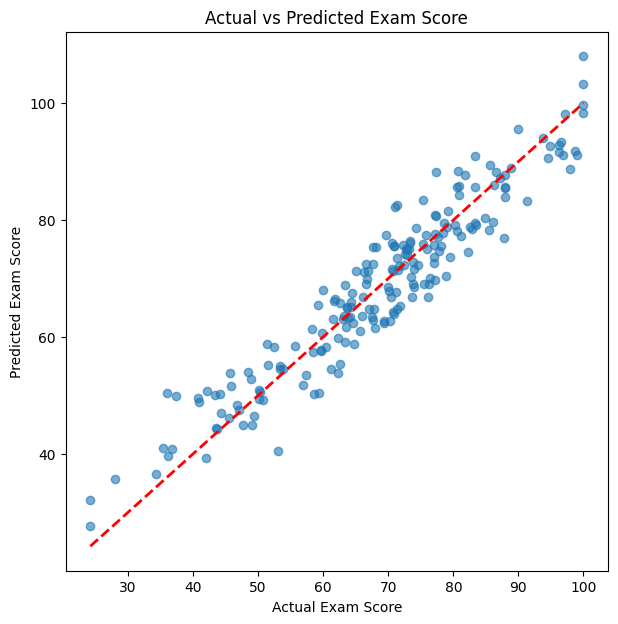

In [23]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Score')
plt.show()